# **Import Libraries and get dataset**

In [399]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

In [400]:
dataset = pd.read_csv('data/data-tc.csv')

In [401]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,1,94,"TC#2027,TC#2928,TC#2053",3,4.0,60.0
1,2,197,"TC#3269,TC#1752,TC#1042",3,4.0,60.0
2,3,163,"TC#2843,TC#3332,TC#805,TC#2785",3,5.0,75.0
3,4,103,"TC#1618,TC#953,TC#1368",1,4.0,20.0
4,5,70,"TC#235,TC#3170,TC#2423",5,4.0,100.0


In [402]:
isCount = dataset['FP'].count()
print(f'Total Data is {isCount}')

Total Data is 3314


# **Preprocess Data**

In [403]:
label_encoder = LabelEncoder()
dataset["B_Req"] = label_encoder.fit_transform(dataset["B_Req"])
dataset["R_Priority"] = label_encoder.fit_transform(dataset["R_Priority"])

In [404]:
dataset["FP"] = dataset["FP"].apply(lambda x: len(x.split(",")))

scaler = StandardScaler()
dataset[["Complexity", "Time", "Cost"]] = scaler.fit_transform(dataset[["Complexity", "Time", "Cost"]])

In [405]:
dataset.fillna(dataset.mean(), inplace=True)
dataset = dataset[(dataset["Complexity"] > -3) & (dataset["Complexity"] < 3)]

In [406]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,0,62,3,-0.023581,0.384733,-0.019140
1,1,165,3,-0.023581,0.384733,-0.019140
2,2,131,4,-0.023581,1.175190,0.346027
3,3,71,3,-1.244620,0.384733,-0.992918
4,4,38,3,1.197458,0.384733,0.954639


In [407]:
X = dataset[['Complexity', 'Time', 'Cost']]
# X = dataset.iloc[:, 1:]

# **K-Means**

In [408]:
from sklearn.cluster import KMeans

In [409]:
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=50)
dataset['Cluster'] = kmeans.fit_predict(dataset[['Complexity', 'Time', 'Cost']] )

In [410]:
score_avg = silhouette_score(X, dataset['Cluster'])
print(f"Score: {score_avg}")

Score: 0.48418821015031827


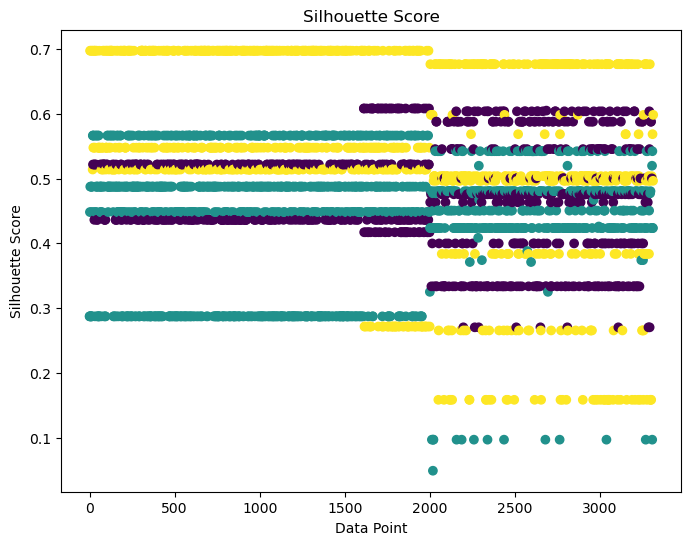

In [411]:
silhouette_values = silhouette_samples(X, dataset['Cluster'])
plt.figure(figsize=(8, 6))
plt.scatter(range(len(silhouette_values)), silhouette_values, c=dataset['Cluster'], cmap='viridis')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Data Point')
plt.show()

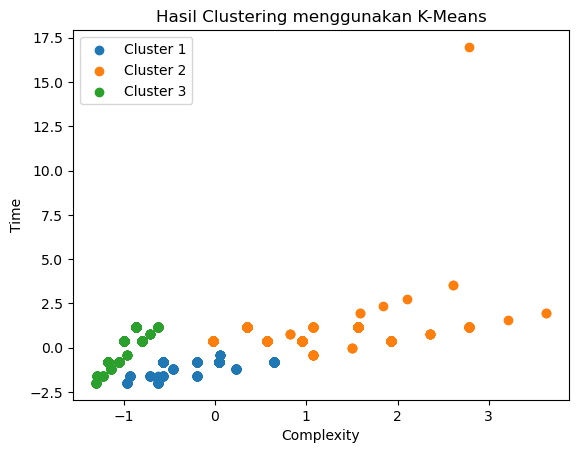

In [412]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()

**Split Data**

In [413]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [414]:
dataset.to_csv('data/kmeans/data-preprocess.csv', index=False)

X_train.to_csv('data/kmeans/data-train.csv', index=False)
X_test.to_csv('data/kmeans/data-test.csv', index=False)

In [415]:
dataset.drop(['Cluster'], axis=1, inplace=True)

# **Hierarchical**

In [416]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

dataset['Cluster'] = agg_clustering.labels_


In [417]:
silhouette = silhouette_score(X, dataset['Cluster'])
print(f"Score: {silhouette}")

Score: 0.43819260583179687


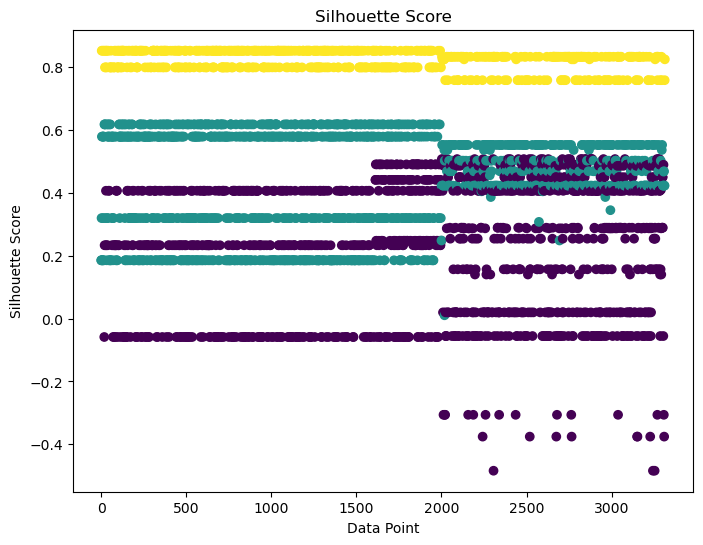

In [418]:
silhouette_values = silhouette_samples(X, dataset['Cluster'])
plt.figure(figsize=(8, 6))
plt.scatter(range(len(silhouette_values)), silhouette_values, c=dataset['Cluster'], cmap='viridis')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Data Point')
plt.show()

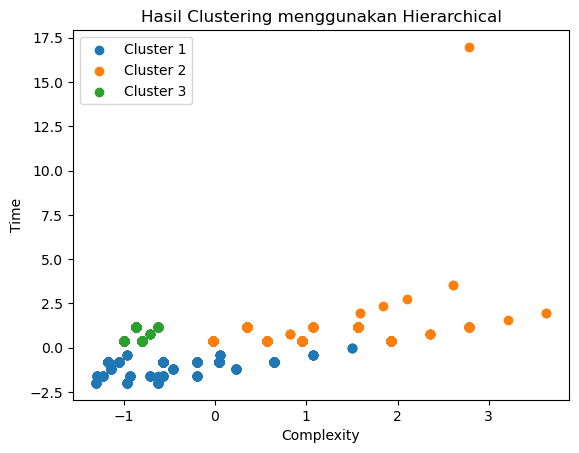

In [419]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan Hierarchical')
plt.show()

In [420]:
dataset.drop(['Cluster'], axis=1, inplace=True)

# **DBSCAN**

In [421]:
from sklearn.cluster import DBSCAN

# Menerapkan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Menambahkan label kelompok ke dalam dataset
dataset['Cluster'] = dbscan.labels_

# Hasil clustering
print(dataset)


      B_Req  R_Priority  FP  Complexity      Time      Cost  Cluster
0         0          62   3   -0.023581  0.384733 -0.019140        0
1         1         165   3   -0.023581  0.384733 -0.019140        0
2         2         131   4   -0.023581  1.175190  0.346027        1
3         3          71   3   -1.244620  0.384733 -0.992918        2
4         4          38   3    1.197458  0.384733  0.954639        3
...     ...         ...  ..         ...       ...       ...      ...
3309   3309         124   2   -1.244620 -0.405723 -0.968574        4
3310   3310          62   3   -0.023581  0.384733  0.565127        9
3311   3311         129   3   -0.023581  0.384733  0.565127        9
3312   3312          36   3   -1.244620  1.175190 -0.627751        2
3313   3313         192   4   -1.244620  0.779962 -0.712957        2

[3314 rows x 7 columns]


In [422]:
silhouette = silhouette_score(X, dataset['Cluster'])
print(f"Score: {silhouette}")

Score: 0.7809271389357674


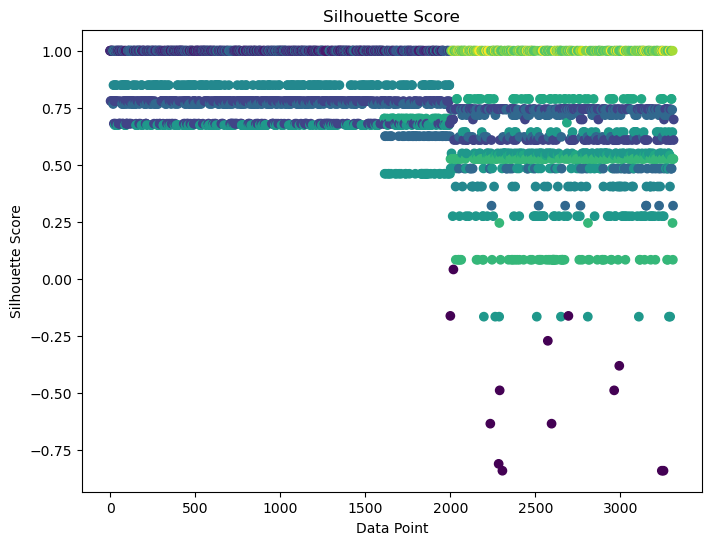

In [423]:
silhouette_values = silhouette_samples(X, dataset['Cluster'])
plt.figure(figsize=(8, 6))
plt.scatter(range(len(silhouette_values)), silhouette_values, c=dataset['Cluster'], cmap='viridis')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Data Point')
plt.show()

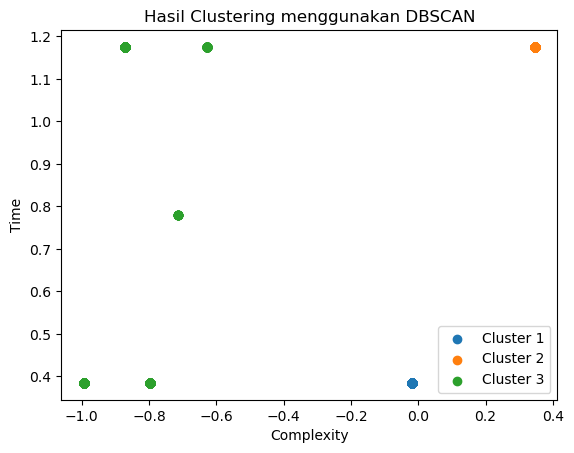

In [424]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan DBSCAN')
plt.show()